# Downside #

In [32]:
import pandas as pd
import risk_kit as rk
import numpy as np
from scipy.stats import norm
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
hfi = rk.get_hfi_returns()

## Semideviation ##

In [34]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [35]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [36]:
rk.semideviation(hfi["2009":])

Convertible Arbitrage     0.006681
CTA Global                0.010996
Distressed Securities     0.009498
Emerging Markets          0.015276
Equity Market Neutral     0.005186
Event Driven              0.010135
Fixed Income Arbitrage    0.003321
Global Macro              0.005075
Long/Short Equity         0.012139
Merger Arbitrage          0.003611
Relative Value            0.005711
Short Selling             0.021240
Funds Of Funds            0.007948
dtype: float64

### VaR and CVaR ###

Value at Risk

- Historic VaR
- Parametric VaR (Gaussian)
- Modified Cornish-Fisher VaR

In [8]:
np.percentile(hfi,5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [11]:
def var_historic(r, level=5):
    """"
    VaR Historic
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be Series or DataFrame")

In [12]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [14]:
rk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [19]:
z = norm.ppf(.05)

In [21]:
-(hfi.mean() + z*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [25]:
rk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

<AxesSubplot:title={'center':'EDHEC Hedge Fund Indices: VaR'}>

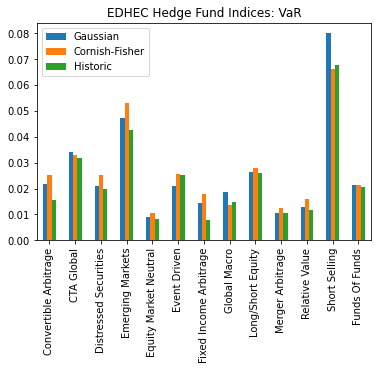

In [27]:
var_list = [rk.var_gaussian(hfi),rk.var_gaussian(hfi,modified=True),rk.var_historic(hfi)]
comparison = pd.concat(var_list, axis=1)
comparison.columns = ["Gaussian","Cornish-Fisher","Historic"]
comparison.plot.bar(title="EDHEC Hedge Fund Indices: VaR")

### Beyond VaR aka CVaR ###

In [29]:
rk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

In [30]:
rk.skewness(hfi["2009":])

Convertible Arbitrage     1.305911
CTA Global                0.052062
Distressed Securities    -0.254944
Emerging Markets          0.033123
Equity Market Neutral    -0.896327
Event Driven             -0.488821
Fixed Income Arbitrage    1.121453
Global Macro              0.348184
Long/Short Equity        -0.463703
Merger Arbitrage         -0.551065
Relative Value            0.159953
Short Selling             0.456518
Funds Of Funds           -0.646908
dtype: float64

In [31]:
rk.kurtosis(hfi["2000":])

Convertible Arbitrage     23.001449
CTA Global                 2.845022
Distressed Securities      6.231720
Emerging Markets           5.941289
Equity Market Neutral     20.329621
Event Driven               5.543444
Fixed Income Arbitrage    33.378729
Global Macro               3.653278
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Relative Value            12.731096
Short Selling              4.352758
Funds Of Funds             7.584725
dtype: float64